In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/baseball-savant-leaderboards-2024/bat_tracking_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/catcher_stance_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/pitch_movement_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/catcher_throwing_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/pitcher_arm_angle_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/running_game_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/arm_strength_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/home_runs_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/basestealing_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/timer_infractions_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/baserunning_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/batted_ball_2024_2025.csv
/kaggle/input/baseball-savant-leaderboards-2024/catcher_blocking_2024_2025.csv
/kaggle/

In [2]:
import pandas as pd

bat = pd.read_csv('/kaggle/input/baseball-savant-leaderboards-2024/bat_tracking_2024_2025.csv')
hr = pd.read_csv('/kaggle/input/baseball-savant-leaderboards-2024/home_runs_2024_2025.csv')
batted = pd.read_csv('/kaggle/input/baseball-savant-leaderboards-2024/batted_ball_2024_2025.csv')

print(bat.columns.tolist())
print(hr.columns.tolist())
print(batted.columns.tolist())

['id', 'name', 'side', 'avg_bat_speed', 'swing_tilt', 'attack_angle', 'attack_direction', 'ideal_attack_angle_rate', 'avg_intercept_y_vs_plate', 'avg_intercept_y_vs_batter', 'avg_batter_y_position', 'avg_batter_x_position', 'competitive_swings', 'year']
['player', 'player_id', 'team_abbrev', 'year', 'type', 'avg_hr_trot', 'doubters', 'mostly_gone', 'no_doubters', 'no_doubter_per', 'hr_total', 'xhr', 'xhr_diff']
['id', 'name', 'bbe', 'gb_rate', 'air_rate', 'fb_rate', 'ld_rate', 'pu_rate', 'pull_rate', 'straight_rate', 'oppo_rate', 'pull_gb_rate', 'straight_gb_rate', 'oppo_gb_rate', 'pull_air_rate', 'straight_air_rate', 'oppo_air_rate', 'year']


In [3]:
# Step 1: Merge bat tracking and home run data on player name/id
bat_hr = pd.merge(bat, hr, left_on=['id', 'year'], right_on=['player_id', 'year'])
bat_hr_batted = pd.merge(bat_hr, batted, on=['id', 'year'])

# Step 2: Filter to 2024 only and meaningful sample size
df = bat_hr_batted[bat_hr_batted['year'] == 2024].copy()

# Step 3: Top 10 players by home runs
print("=== TOP 10 HR HITTERS 2024 ===")
print(df[['name_x', 'hr_total', 'avg_bat_speed', 'attack_angle', 'no_doubters']].sort_values('hr_total', ascending=False).head(10).to_string())

# Step 4: Correlation between bat speed and home runs
print("\n=== CORRELATIONS WITH HR TOTAL ===")
cols = ['avg_bat_speed', 'attack_angle', 'ideal_attack_angle_rate', 'no_doubter_per', 'fb_rate', 'pull_air_rate']
print(df[cols + ['hr_total']].corr()['hr_total'].sort_values(ascending=False).to_string())

# Step 5: High bat speed vs low bat speed HR average
median_speed = df['avg_bat_speed'].median()
high_speed = df[df['avg_bat_speed'] >= median_speed]['hr_total'].mean()
low_speed = df[df['avg_bat_speed'] < median_speed]['hr_total'].mean()
print(f"\n=== BAT SPEED vs HR ===")
print(f"Avg HRs (high bat speed): {high_speed:.1f}")
print(f"Avg HRs (low bat speed): {low_speed:.1f}")

# Step 6: Top 10 hardest hit home runs (no doubters)
print("\n=== TOP 10 MOST DOMINANT HR HITTERS (No-Doubter %) ===")
print(df[['name_x', 'no_doubters', 'no_doubter_per', 'avg_bat_speed']].sort_values('no_doubter_per', ascending=False).head(10).to_string())

=== TOP 10 HR HITTERS 2024 ===
                 name_x  hr_total  avg_bat_speed  attack_angle  no_doubters
5          Judge, Aaron        61      77.146850     14.371586           30
9        Ohtani, Shohei        57      76.315503     11.317201           33
16           Soto, Juan        45      75.428274     12.195015           25
128       Ramírez, José        41      71.552396      9.920952           20
53        Rooker, Brent        39      73.681734     11.665495           24
1       Schwarber, Kyle        39      77.516124     13.052599           23
47       Ozuna, Marcell        39      74.020914     15.356603           19
18         Alonso, Pete        38      75.234998      9.806641           21
10    Henderson, Gunnar        37      76.286240      8.320931           12
67   Hernández, Teoscar        36      73.234490      9.068737           14

=== CORRELATIONS WITH HR TOTAL ===
hr_total                   1.000000
avg_bat_speed              0.430825
fb_rate                  

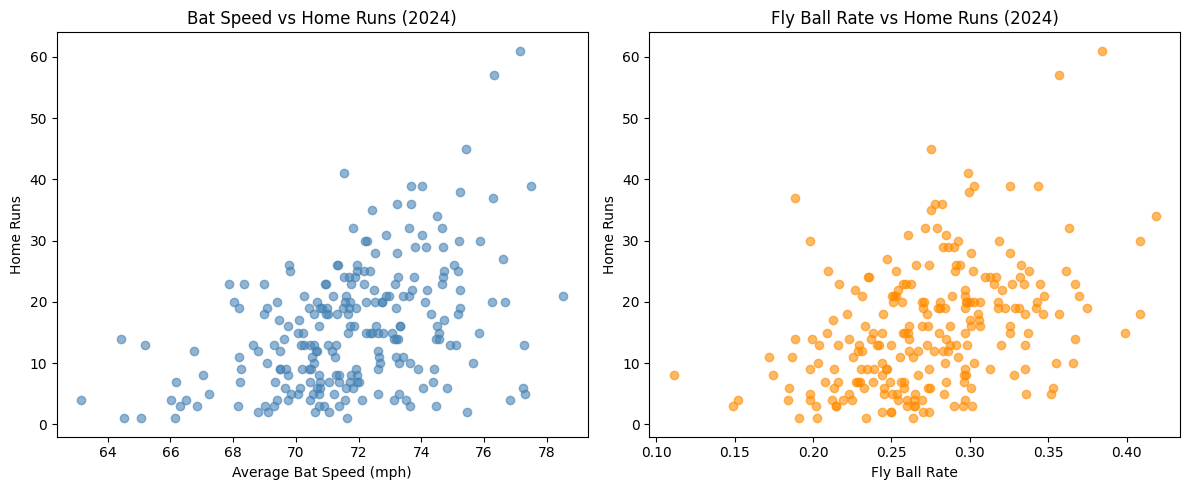

Chart saved.


In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Chart 1: Bat speed vs HR
axes[0].scatter(df['avg_bat_speed'], df['hr_total'], alpha=0.6, color='steelblue')
axes[0].set_xlabel('Average Bat Speed (mph)')
axes[0].set_ylabel('Home Runs')
axes[0].set_title('Bat Speed vs Home Runs (2024)')

# Chart 2: Fly ball rate vs HR
axes[1].scatter(df['fb_rate'], df['hr_total'], alpha=0.6, color='darkorange')
axes[1].set_xlabel('Fly Ball Rate')
axes[1].set_ylabel('Home Runs')
axes[1].set_title('Fly Ball Rate vs Home Runs (2024)')

plt.tight_layout()
plt.savefig('hr_analysis.png')
plt.show()
print("Chart saved.")